# Variability of the inorganic carbon system in a large coastal lagoon of the southern Gulf of Mexico

### José Andrés Martínez-Trejo<sup>1</sup>, Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, Joan Albert Sanchez-Cabeza<sup>3</sup>, José Martin Hernández Ayón<sup>4</sup>, Ana Carolina Ruiz-Fernández<sup> 3 </sup>, Mario Alejandro Gómez-Ponce <sup>2</sup> , Linda Barranco-Servín<sup>5</sup>, Daniel Pech<sup>5</sup>

<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México

<sup> 4 </sup>  Instituto de Investigaciones Oceanológicas, Universidad Autónoma de Baja California, Km. 103 CarreteraTijuana-Ensenada, Ensenada, Baja California, México

<sup> 5 </sup> Laboratorio de Biodiversidad Marina y Cambio Climático (BIOMARCCA), El Colegio de la Frontera Sur, Lerma, Campeche, México. 

 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://falta)


- Read csv raw data file

In [1]:
import pandas as pd
url = "https://metadata.icmyl.unam.mx/bitstream/handle/20.500.12201/11367/MartinezTrejo_etal_2023_TA_DIC_RawData.csv?sequence=1&isAllowed=y"
myCO2data = pd.read_csv(url, sep=",", header=0,  decimal=".",
                        encoding='utf-8')


- PyCO2SYS configuration from estuarine waters (Humphreys et al. 2022)

In [2]:
import PyCO2SYS as pyco2
myCO2sysParamsDICTA_data = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": myCO2data["DIC_micromol_kg"],
    # TA measured in the lab, Total scale
    "par2": myCO2data["TA_micromol_kg"],
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": myCO2data["Sal_psu"],  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": myCO2data["Temp_C"],
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "opt_k_carbonic": 14,
    "temperature": 25      # lab temperature (input conditions) in °C
}


- Run PyCO2SYS

In [3]:
CO2results= pyco2.sys(**myCO2sysParamsDICTA_data)

- Read intesring variables from CO2results dictionary

In [4]:
myVarsDictonary = {"pH": CO2results["pH"],
       "OmegaAragonite": CO2results["saturation_aragonite"],
       "pCO2_atm":CO2results["pCO2_out"]}
myVars = pd.DataFrame.from_dict(myVarsDictonary, orient='columns')

- Concatenate pandas data frame

In [5]:
CarbonateVarsTL = pd.concat([myCO2data, myVars], axis=1)

# References
- Humphreys, M. P., Lewis, E. R., Sharp, J. D., & Pierrot, D. (2022). PyCO2SYS v1.8: Marine carbonate system calculations in Python. Geoscientific Model Development, 15(1), 15–43. https://doi.org/10.5194/gmd-15-15-2022
- Millero, F. J. (2010). Carbonate constants for estuarine waters. Marine and Freshwater Research, 61(2), 139. https://doi.org/10.1071/MF09254
- Wolf-Gladrow, D. A., Zeebe, R. E., Klaas, C., Körtzinger, A., & Dickson, A. G. (2007). Total alkalinity: The explicit conservative expression and its application to biogeochemical processes. Marine Chemistry, 106(1–2), 287–300. https://doi.org/10.1016/j.marchem.2007.01.006

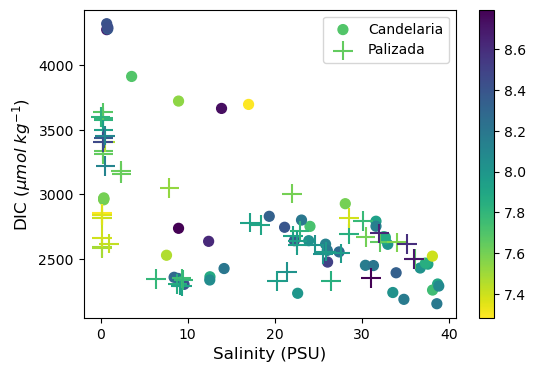

In [53]:
import matplotlib.pyplot as plt
import numpy as np 

# getting the original colormap using cm.get_cmap() function
orig_map = plt.colormaps.get_cmap('viridis')

# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()

CandelariaResult = CarbonateVarsTL.loc[CarbonateVarsTL["Estuary"] == "Candelaria"]
                     
PalizadaResult = CarbonateVarsTL.loc[CarbonateVarsTL["Estuary"] == "Palizada"]


# Create the scatter plot with Seaborn

scatter = plt.scatter(
    x=CandelariaResult["Sal_psu"], y=CandelariaResult["DIC_micromol_kg"], c=CandelariaResult["pH"], cmap=reversed_map,
    marker='.', s= 200, label='Candelaria' )


scatter = plt.scatter(
    x=PalizadaResult["Sal_psu"], y=PalizadaResult["DIC_micromol_kg"], c=PalizadaResult["pH"], cmap=reversed_map,
    marker='+', s= 200, label='Palizada')


# Add a color bar
plt.colorbar(scatter)


# Add labels and title
plt.xlabel('Salinity (PSU)', fontsize = 12)
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)
plt.legend(loc='upper right')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file
plt.savefig('scatter_plot.pdf', dpi=300, bbox_inches='tight')

# display the plot
plt.show()

